### Homework 

1. Plot the passes and shots leading up to the second and third goals of the match 

2. Plot all the shots by player 9 of the home team. Use a different symbol and transparancy (alpha) for shots that resulted in goals. 

3. Plot the positions of all players at Player 9's goal

4. Calculate how far each player ran 



In [93]:
import LaurieOnTracking.Metrica_IO as mio
import LaurieOnTracking.Metrica_Viz as mviz
import LaurieOnTracking.Metrica_Velocities as mvel

import numpy as np
import scipy.signal as signal


In [2]:
# set up initial path to data
DATADIR = 'sample-data/data/'
game_id = 2 # let's look at sample match 2


In [3]:
events = mio.read_event_data(DATADIR,game_id)
events = mio.to_metric_coordinates(events)

In [4]:
# Add a column event 'Minute' to the data frame
events['Minute'] = events['Start Time [s]']/60.

In [5]:
## list of columns not including minutes 
cols_without_minutes = events.columns[:14]

In [6]:
### All goals in match, with minute 
events.loc[events['Subtype'].str.contains('TARGET-GOAL',na=False)]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04,8.134667
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36,35.366000
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72,76.672667
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72,80.684667


In [7]:
## Create dictionary of goal event data 
goals_dict = events.loc[events['Subtype'].str.contains('TARGET-GOAL',na=False)].to_dict(orient='index')

In [8]:
## Index + 1 == "GOAL" sequential order 
goals_key = list(goals_dict.keys())
goals_key

[198, 823, 1118, 1671, 1723]

### Shots and passes leading up to GOAL 2 

In [9]:
## All events between goal 1 and goal 2, inclusive for goal 2 

events_g1_g2 = events.loc[
    (events['Minute']> events.iloc[goals_key[0]]['Minute']) & 
    (events['Minute']<= events.iloc[goals_key[1]]['Minute'])]

In [10]:
### SHOT and PASS event data between goal 1 and goal 2 
events_g1_g2_shot_pass = events_g1_g2.loc[(events_g1_g2['Type']=='SHOT') | 
                                          (events_g1_g2['Type']=='PASS')]

(<matplotlib.figure.Figure at 0x1130bcb70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1130f74a8>)

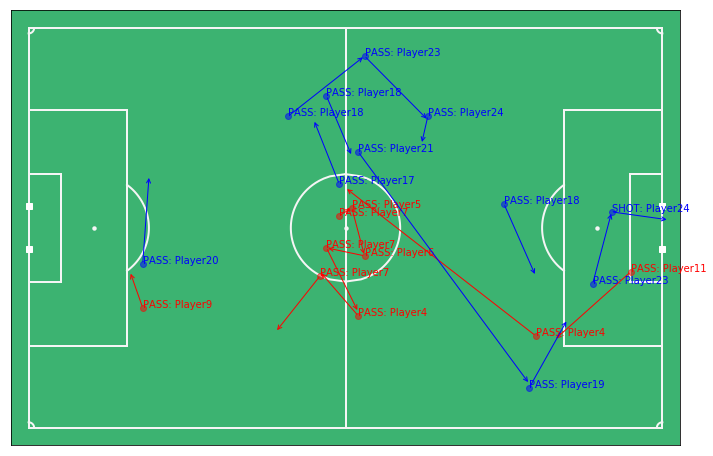

In [11]:
## n-Evenets before goal 
## Color coded home and away teams passing and shot maps 

## RED = HOME
## BLUE = AWAY 

n = 20
mviz.plot_events_w_team_filter(events_g1_g2_shot_pass[cols_without_minutes][-n:], 
                 indicators = ['Marker','Arrow'], annotate=True,)

### Shots and passes leading up to GOAL 3

In [12]:
## All events between goal 1 and goal 2, inclusive for goal 2 

events_g2_g3 = events.loc[
    (events['Minute']> events.iloc[goals_key[1]]['Minute']) & 
    (events['Minute']<= events.iloc[goals_key[2]]['Minute'])]

In [13]:
### SHOT and PASS event data between goal 1 and goal 2 
events_g2_g3_shot_pass = events_g2_g3.loc[(events_g2_g3['Type']=='SHOT') | 
                                          (events_g2_g3['Type']=='PASS')]

(<matplotlib.figure.Figure at 0x1135cfe48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1135e44a8>)

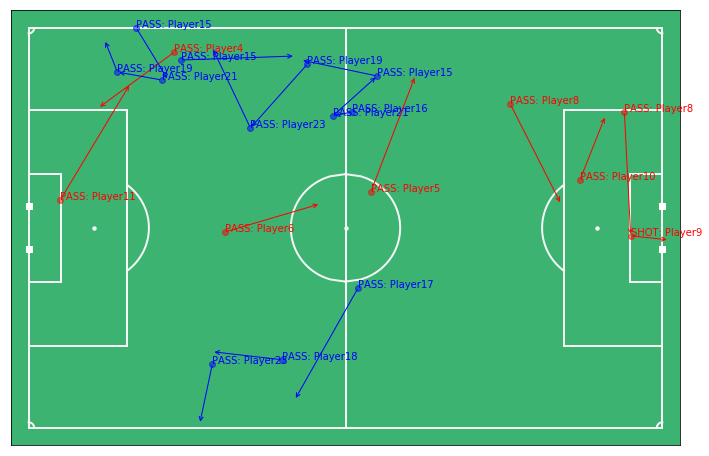

In [14]:
## n-Evenets before goal 
## Color coded home and away teams passing and shot maps 

n = 20
mviz.plot_events_w_team_filter(events_g2_g3_shot_pass[cols_without_minutes][-n:], 
                 indicators = ['Marker','Arrow'], annotate=True,)

### Plot all the shots by player 9 of the home team. Use a different symbol and transparancy (alpha) for shots that resulted in goals. 





In [15]:
shots_player_9_home = events.loc[(events['Team']=='Home') & (events['Type']=='SHOT') & (events['From']=='Player9') ]

In [16]:
shots_player_9_home

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44,78.145333
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48,82.890667
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36,93.260667


HEAD-ON TARGET-GOAL
HEAD-OFF TARGET-OUT
HEAD-OFF TARGET-OUT
ON TARGET-SAVED


(<matplotlib.figure.Figure at 0x1135cf710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113b75978>)

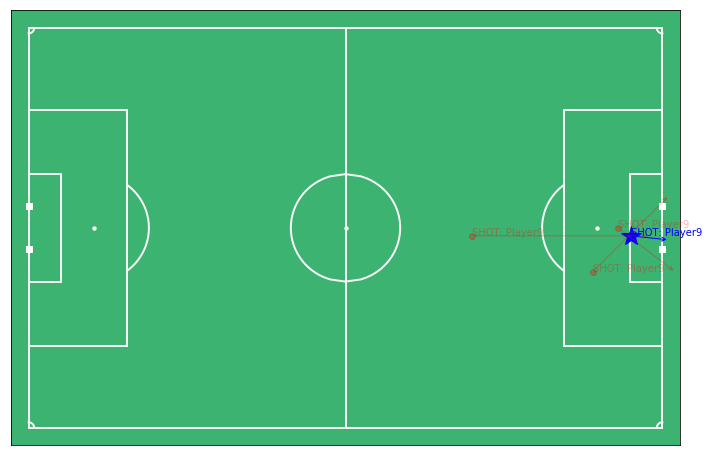

In [17]:
### GOAL IS A DIFFERENT COLOR AND SYMBOL VS ALL OTHER SHOTS -- a bit inconsistent with home vs away color scheme above wh
mviz.plot_shots(shots_player_9_home,indicators = ['Marker','Arrow'], annotate=True,alpha=.3)

### Plot the positions of all players at Player 9's goal


In [58]:
tracking_home = mio.tracking_data(DATADIR,game_id,'home')
tracking_away = mio.tracking_data(DATADIR,game_id,'away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away


In [59]:
tracking_data = mio.merge_tracking_data(tracking_home,tracking_away)

In [60]:
len(tracking_home)

141156

In [61]:
len(tracking_away)

141156

In [72]:
tracking_data['Minute'] = tracking_data['Time [s]_x']/60.

In [75]:
events.loc[events['Minute']==49.322000]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
1117,Home,CHALLENGE,AERIAL-WON,2,73983,2959.32,73983,2959.32,Player9,NaN,47.70,-1.36,NaN,NaN,49.322
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322
1119,Away,CHALLENGE,AERIAL-LOST,2,73983,2959.32,73983,2959.32,Player18,NaN,46.64,-2.72,NaN,NaN,49.322


In [85]:
events.loc[(events['Minute']==49.322000) & (events['Type']=='SHOT')]['Start Frame'].values[0]

73983

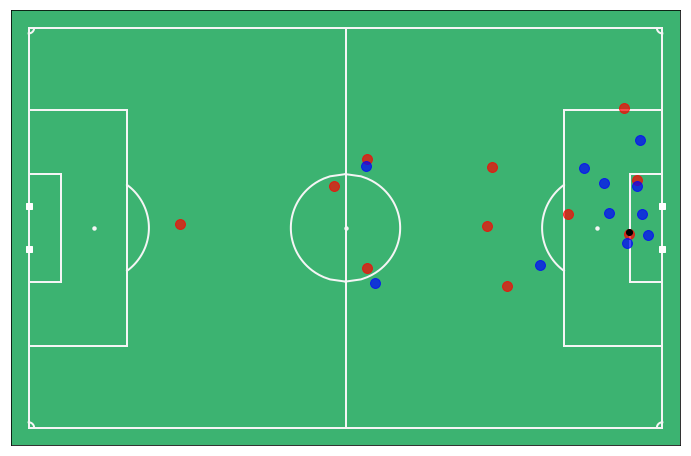

In [86]:
KO_Frame = events.loc[(events['Minute']==49.322000) & (events['Type']=='SHOT')]['Start Frame'].values[0]

fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

In [92]:
def calc_player_velocities(team, filter_='Savitzky-Golay', window=7, polyorder=1, maxspeed = 10):
    # Get the player ids
    player_ids = np.unique( [ c[:-2] for c in team.columns if c[:4] in ['Home','Away'] ] )

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = team['Time [s]'].diff()
    # index of first frame in second half
    second_half_idx = team.Period.idxmax(2)
    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually
        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        vx = team[player+"_x"].diff() / dt
        vy = team[player+"_y"].diff() / dt
        
        # calculate first half velocity
        vx.loc[:second_half_idx] = signal.savgol_filter(vx.loc[:second_half_idx],window_length=window,polyorder=polyorder)
        vy.loc[:second_half_idx] = signal.savgol_filter(vy.loc[:second_half_idx],window_length=window,polyorder=polyorder)
        
        # calculate second half velocity
        vx.loc[second_half_idx:] = signal.savgol_filter(vx.loc[second_half_idx:],window_length=window,polyorder=polyorder)
        vy.loc[second_half_idx:] = signal.savgol_filter(vy.loc[second_half_idx:],window_length=window,polyorder=polyorder)
        
        # put player speed in x,y direction, and total speed back in the data frame
        team[player + "_vx"] = vx
        team[player + "_vy"] = vy
        team[player + "_speed"] = np.sqrt( vx**2 + vy**2 )

        #still need to implement a maxspeed cut-off
    return team

In [115]:
calc_player_distance(tracking_data)

array(['away_15_', 'away_16_', 'away_17_', 'away_18_', 'away_19_',
       'away_20_', 'away_21_', 'away_22_', 'away_23_', 'away_24_',
       'away_25_', 'away_26_', 'home_10_', 'home_11_', 'home_12_',
       'home_13_', 'home_14_', 'home_1_', 'home_2_', 'home_3_', 'home_4_',
       'home_5_', 'home_6_', 'home_7_', 'home_8_', 'home_9_'], dtype='<U8')

In [114]:
def calc_player_distance(team, filter_='Savitzky-Golay', window=7, polyorder=1, maxspeed = 10):
    # Get the player ids
    player_ids = np.unique( [ c[:-1] for c in team.columns if c[:4] in ['home','away'] ] )
    return player_ids

In [123]:
tracking_data.columns

Index(['Period_x', 'Time [s]_x', 'home_11_x', 'home_11_y', 'home_1_x',
       'home_1_y', 'home_2_x', 'home_2_y', 'home_3_x', 'home_3_y', 'home_4_x',
       'home_4_y', 'home_5_x', 'home_5_y', 'home_6_x', 'home_6_y', 'home_7_x',
       'home_7_y', 'home_8_x', 'home_8_y', 'home_9_x', 'home_9_y', 'home_10_x',
       'home_10_y', 'home_12_x', 'home_12_y', 'home_13_x', 'home_13_y',
       'home_14_x', 'home_14_y', 'Period_y', 'Time [s]_y', 'away_25_x',
       'away_25_y', 'away_15_x', 'away_15_y', 'away_16_x', 'away_16_y',
       'away_17_x', 'away_17_y', 'away_18_x', 'away_18_y', 'away_19_x',
       'away_19_y', 'away_20_x', 'away_20_y', 'away_21_x', 'away_21_y',
       'away_22_x', 'away_22_y', 'away_23_x', 'away_23_y', 'away_24_x',
       'away_24_y', 'away_26_x', 'away_26_y', 'ball_x', 'ball_y', 'Time_mins',
       'Minute'],
      dtype='object')

In [134]:
player_ids = np.unique( [ c[:-1] for c in tracking_data.columns if c[:4] in ['home','away'] ] )

In [148]:
player_location_data = tracking_data[[player_ids[0]+'x',player_ids[0]+'y']].values

In [172]:
player_dist={}
for player_id in player_ids:
    player_location_data = tracking_data[[player_id+'x',player_id+'y']].values

    dis_list = []
    for ind, val in enumerate(player_location_data):
        if ind == len(player_location_data)-1:
            break
        a,b = val, player_location_data[ind+1]
        if ind == 0:
            dis_list.append(0)
        dis_list.append(np.linalg.norm(a-b))
    dis_list = np.asarray(dis_list)
    player_dist[player_id]=dis_list


In [217]:
player_dist_sum = {}
for i in player_dist.keys():
    player_dist_sum[i]  = np.nansum(player_dist[i])


In [215]:
import pandas as pd

In [227]:
pd.DataFrame.from_dict(player_dist_sum, orient='index').rename(columns={0:'Meters covered'})

,Meters covered
away_15_,10330.623129
away_16_,9601.728664
away_17_,9406.651122
away_18_,10468.633633
away_19_,11245.079019
away_20_,10981.186328
away_21_,10073.053749
away_22_,6419.742064
away_23_,9736.236143
away_24_,9967.092460
